# Performing Linear Regression on Advertising dataset

In [4]:
#The input file for this is hosted in https://drive.google.com/file/d/12mzwM_KgRb7T9GydP9NCWk92se50mh77/view?usp=drive_link

## Why do you use Regression Analysis?

Regression analysis estimates the relationship between two or more variables. 


In [7]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# this allows plots to appear directly in the notebook
%matplotlib inline

Let's take a look at some data, ask some questions about that data, and then use Linear regression to answer those questions.

In [9]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.columns = ['TV','Radio','Newspaper','Sales']
data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

 **Independent variables**
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

**Target Variable**
- Sales: sales of a single product in a given market (in thousands of widgets)

In [11]:
# print the shape of the DataFrame
data.shape

(200, 4)

<Axes: xlabel='Newspaper', ylabel='Sales'>

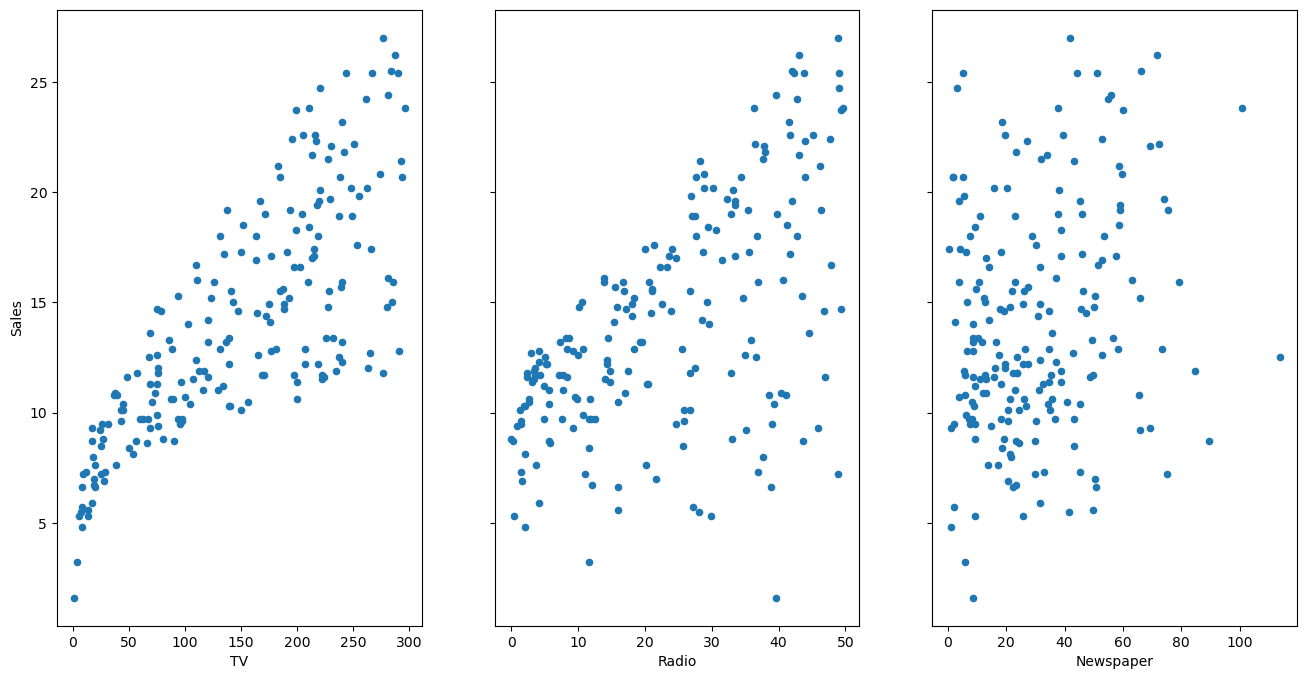

In [12]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data

On the basis of this data, how should you spend advertising money in the future?
These general questions might lead you to more specific questions:

1. Is there a relationship between TV-ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending, can sales be predicted?

Exploring these questions below.

In [14]:
# create X and y
#taking only one variable for now
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


## Interpreting Model Coefficients

How do you interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending was **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads was **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. How would you predict the sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [17]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, you would predict Sales of **9,409 widgets** in that market.

In [19]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

TV
0  50

In [20]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [22]:
x_min, x_max = X.iloc[:, 0].min(), X.iloc[:, 0].max()

In [23]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [x_min,x_max]})
X_new.head()

TV
0    0.7
1  296.4

In [24]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

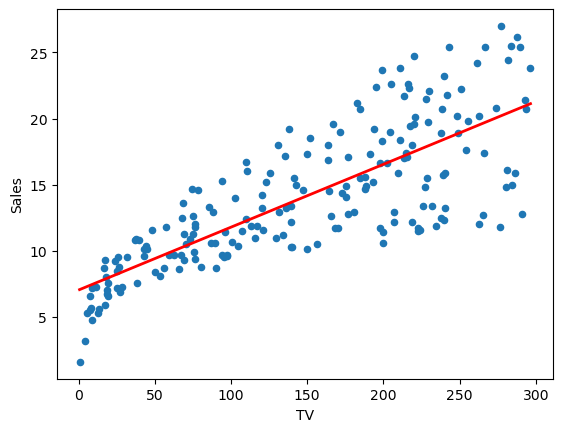

In [25]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot([x_min,x_max], preds, c='red', linewidth=2)

## Linear Regression using statsmodel

In [27]:
import statsmodels.api as sm

X = data['TV']
y = data['Sales']

X2 = sm.add_constant(X)
## Why adding constant ?
## sm.add_constant in statsmodel is the same as sklearn's fit_intercept parameter 
## in LinearRegression(). 
## If you don't do sm.add_constant or when LinearRegression(fit_intercept=False), 
## then both statsmodels and sklearn algorithms assume that b=0 in y = mx + b, 
## and it'll fit the model using b=0 instead of calculating what b is supposed 
## to be based on your data.

est = sm.OLS(y, X2)  ## OLS of sm module is asame as LR of sklearn

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.47e-42
Time:                        12:38:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Statitistical Analysis :
--

1. Looking at both coefficients, we have a p-value that is very low (although it is probably not exactly 0). This means that there is a strong correlation between these coefficients and the target (Sales).

2. Then, looking at the R² value, we have 0.612. Therefore, about 60% of the variability of sales is explained by the amount spent on TV ads. This is okay, but definitely not the best we can to accurately predict the sales. Surely, spending on newspaper and radio ads must have a certain impact on sales.

**Let’s see if a multiple linear regression will perform better.** -- later topic

Assessing the relevancy of the model
--

To see if the model is any good, we need to look at the :

<h4><b> p-value from each coefficient. </b> </h4>

> P-values and coefficients in regression analysis work together to tell you which relationships in your model are statistically significant.

> For any modelling task, the hypothesis is that there is some correlation between the features and the target. The null hypothesis is therefore the opposite: there is no correlation between the features and the target.

> So, finding the p-value for each coefficient will tell if the variable is statistically significant to predict the target. **As a general rule of thumb, if the p-value is less than 0.05: there is a strong relationship between the variable and the target.**

<hr />

<h4> <b> R² value  </b></h4>

> Assess the accuracy of the model. 
You found out that your variable was statistically significant by finding its p-value. Great!
Now, how do you know if your linear model is any good?
To assess that, we use R² statistic.

> R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

> R-squared is always between 0 and 100%:

> 0% represents a model that does not explain any of the variation in the response variable. around its mean. **Discard this model !!  Simple.**

> 100% represents a model that explains all of the variation in the response variable around its mean.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [31]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

#create train and test split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=100)

In [32]:
#without using train and test split dataset
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [33]:
# using train, test datasets
lm = LinearRegression()
lm.fit(xtrain, ytrain)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)


# predictions  on test dataset
predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))

2.652789668879496
[0.0454256  0.18975773 0.00460308]
1.360397733813055


**Notice** that the coefficient for newspaper is negative, but also fairly small. 

> Is it relevant to our model? 

Let’s see by calculating the R² value and p-value for each coefficient.

In [38]:
##Assessing the relevancy of the model

X2 = sm.add_constant(X)

est = sm.OLS(y, X2)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.58e-96
Time:                        12:38:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

What are a few key things you learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus, reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending was **slightly negatively associated** with Sales. (However, this is irrelevant since as you have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.  ( See this once : https://statisticsbyjim.com/regression/interpret-adjusted-r-squared-predicted-r-squared-regression/ )